In [1]:
import numpy as np
import pandas as pd

# jupyter notebook출력 - 소수점 3자리
%precision 3
# DataFrame 출력 시 소수점 제한 pd.set_option("precision" , )
pd.set_option("precision",3)

In [2]:
df = pd.read_csv("C:\\Users\\pc\\Book\\누구나파이썬통계분석\\data\\ch2_scores_em.csv",
                index_col = "student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df.english[:10])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


평균값(mean) = sum()/len()

In [5]:
np.mean(scores) # == sum(scores)/len(scores)

55.0

In [6]:
scores_df.mean()

score    55.0
dtype: float64

중앙값 median()
- 데이터의 갯수가 홀수이면 (n+1)/2 번째가 중앙값
- 짝수이면 (n)/2 번째와 n/2+1 번째
파이썬 리스트의 인덱스는 0부터 시작하기때문에 설명된 중앙값의 정의와 1만큼 차이가 남

In [7]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [8]:
n = len(sorted_scores)
if n%2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [9]:
scores_df.median()  # np.median(scores_df)

score    56.5
dtype: float64

최빈값 mode()
- 가장많이 나오는 값

In [10]:
pd.Series([1,2,3,4,5,6,5,5]).mode()

0    5
dtype: int64

In [11]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

데이터 산포도 지표
편차

In [12]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [13]:
another = [50,60,58,54,51,56,57,53,52,59]
a_mean = np.mean(another)
a_deviation = another - a_mean
a_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [14]:
a_deviation.mean()

0.0

In [15]:
np.mean(deviation) #편차의 평균0

0.0

In [16]:
np.mean(a_deviation)

0.0

In [17]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [18]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

B와D 가 동일한 편차값을 갖고 있기때문에 편차의 제곱을 이용 
그리고 그 평균으로 정의되는 지표가 분산(Variance)

In [19]:
np.var(scores) # np.var() 넘파이 표본분산

86.0

In [20]:
summary_df['square of deviation'] = np.square(deviation) # 편차의 제곱 출력
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [21]:
np.mean(summary_df)

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

표준편차 
- 분산에 제곱근
- np.var() 와 np.sqrt()로 도출하거나, np.std()로 도출
- ddof = 0 : 표본분산에 제곱근을 취한것이 출력됨

In [22]:
np.sqrt(np.var(scores,ddof=0)) 

9.273618495495704

In [23]:
scores.std(ddof=0)

9.273618495495704

범위와 사분위 범위
- 범위(Range) : 데이터의 최댓값과 최솟값만으로 산포도를 표현
- range = max - min

In [24]:
scores.max() - scores.min()

28

사분위 범위(IQR) 
- 데이터의 하위 25%,50%,75% 위치하는 값 표현, 이를 각각 1사분위수(Q1), 2사분위수(Q2), 3사분위수(Q3) 라고 표현
- percentile 함수로 구할 수 있다
- IQR = Q3-Q1

In [25]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
IQR = scores_Q3 - scores_Q1
IQR

15.0

In [26]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

데이터 정규화
- 정규화(nomarlization) : 데이터를 0~1 사이의 통일된 지표로 변환하는 것
- 표준화(standardization) : 평균0 분산이 1이 되도록 변환 (평균을 빼고 표준편차로 나누는 작업)

scores를 표준화(standardization) 해보도록 하자

In [27]:
# 표준화 : 데이터에서 평균을 빼고 표준편차로 나누는 작업

z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [28]:
# 정규화(Nomarliztion) : 평균은 0, 분산은 1로 맞추는 작업,
# 0을 기준으로 가운데 모았다고 생각 
#  내값은 왜저러니?
np.mean(z), np.std(z,ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

편찻값

In [29]:
# 정규화이지만 평균 50 , 표준편차 10이 되도록 만드는 작업
z = 50+10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [30]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


1차원 데이터의 시각화

In [31]:
# 50명의 영어점수 array
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [32]:
# Series로 변환해서 describe()
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

도수분포표(frequency distribution table)
 - describe() 메서드에 나오지않는 세부적인 내용을 알고 싶을때 사용
 - 분할된 구간과 데이터의 개수를 표로 정리한 것
 ex ) 시험점수를 10점 간격으로 나눈 후 간 구간의 점수를 얻은 학생이 몇명인지 세어서 도수분포표 작성
 - 10점 간격의 구간을 계급(class)
 - 각 계급에 속한 학생 수를 도수(frequency)
 - 각 구간의 폭을 계급폭, 계급의 수를 계급수 라고 한다

In [33]:
# np.histogram 으로 도수 구하기
# bins = range의 간격을 10단위로 
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [34]:
# 10 간격의 클래스를 문자열 리스트로 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
# freq_class 를 인덱스로  DataFrame작성
freq_dist_df = pd.DataFrame({'frequency':freq}, index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


계급값 : 각 계급을 대표하는 계급의 중앙값

In [35]:
# class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value = [(i+(i+10)) //2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [36]:
#상대도수 : 전체데이터에서 해당 class가 차지하는 비율
rel_freq =freq/ freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [37]:
# 누적상대도수 : 해당계급까지 상대도수의 합
# 누적합 계산 : np.cumsum함수 사용
com_rel_freq = rel_freq.cumsum()
com_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [38]:
#계급값과 상대도수와 누적상대도수를 도순분포표에 추가하기

freq_dist_df['class value'] = class_value
freq_dist_df['relative frequence'] = rel_freq
freq_dist_df['comulative relative frequence'] = com_rel_freq
freq_dist_df = freq_dist_df[['class value' , 'frequency' , 'relative frequence' , 'comulative relative frequence']] 
freq_dist_df

,class value,frequency,relative frequence,comulative relative frequence
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


- 전체학생의 68%가 50-70점 사이임을 알수 있고
- 전체학생 중 절반이 60점 이하 점수라는 것을 알수 있다
- 60-70계급의 도수가 최대이고 데이터의 최댓값은 65점

In [39]:
# 최빈값 대검토 : 도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값
# frequency로 가장높은 빈도 제크 후 idmax() 로 최대 값 찾기
# freq_dist_df.loc[freq_dist_df['frequency'].idxmax()]
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

히스토그램(막대그래프)
- Matplotlib 라이브러리 필요


In [40]:
import matplotlib.pyplot as plt
# 그래프를 jupyter notebook 위에 표시
%matplotlib inline

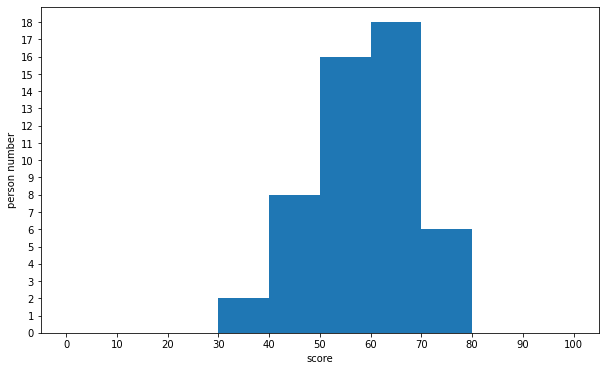

In [41]:
# 밑그림
# 캔버스 생성, figsize 로 가로 세로 크기지정
fig = plt.figure(figsize=(10,6))
# 캔버스 위에 그래프를 그리기 위한 영역 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)


# 계급수를 10으로 지정
freq, _, _ = ax.hist(english_scores, bins=10 , range = (0,100))

# x축에 레이블 부여
ax.set_xlabel('score')
# y 축에 레이블 부여
ax.set_ylabel('person number')

#x x축을 0,10,20..., 100 눈금으로 구분 
# 0, 10, 20 .... 100까지 하면 총 11개를 사용하기에 10+1을 해줘야함
ax.set_xticks(np.linspace(0,100,10+1))

#y축을 0,1,2..., 눈금으로 구분

ax.set_yticks(np.arange(0,freq.max()+1))

#그래프 표시
plt.show()

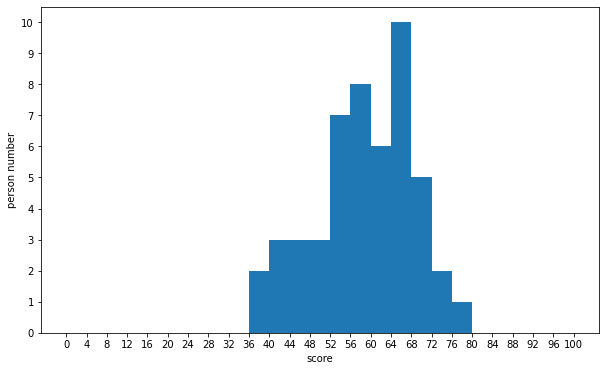

In [42]:
# 계급수를 늘려 세부적이 데이터분포 확인하기
#  계급수 10 =>25, 계급폭 10=>4
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

freq,_,_= ax.hist(english_scores, bins= 25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

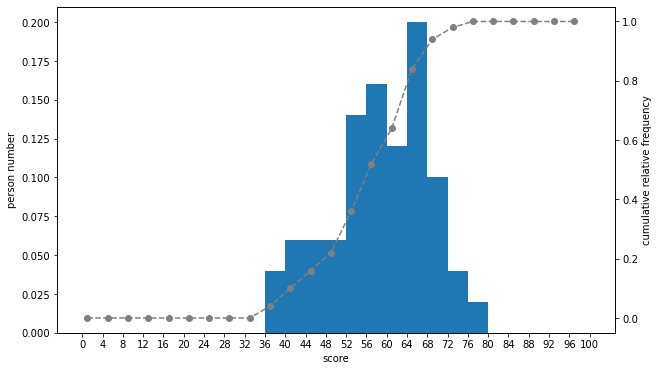

In [48]:
# 히스토그램을 누적상대도수의 꺽은선 그래프와 함께 그리기
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

# y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기위해서 도수를 데이터의 수로 나누어야함
# hist의 인수 weight를 지정

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+2))//2 for i in range(0,100,4)]

# 꺽은선 그래프를 그림
# 인수 ls를 '--로 하면 점선이 그려짐'
# 인수 marker를 '0'으로 하면 데이터 점을 그림
# 인수color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

# 꺽은선 그래프 눈금선 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

상자그림(box plot) : 데이터 산포도를 표현
- 데이터의 분포와 이상값을 시각적으로 파악


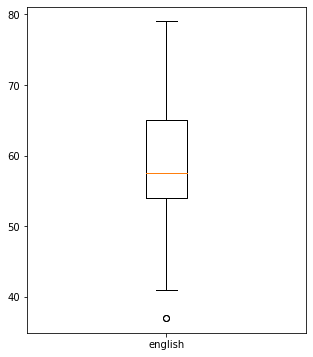

In [49]:
# boxplot메서드 사용
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'english'